## Lasso and Ridge - Residual Analysis 

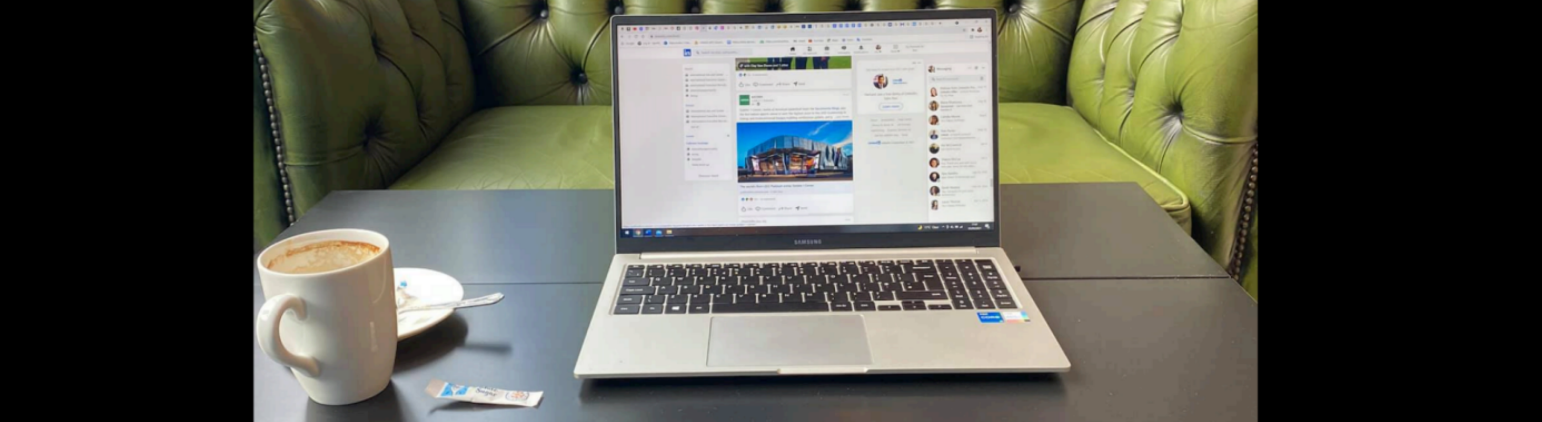

#### Hemant Thapa 

In [4]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#### Creating Feature and Target 

In [6]:
#generate 
np.random.seed(0)

In [7]:
#Features
X = np.linspace(-4, 4, 500)
#Target 
y = 0.5 * X**3 - X**2 + X + np.random.randn(*X.shape) * 3

#### Spliting Data into Train and Test 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
#Split data into train and test
#80 percent train and 20 percent test
X_train, X_test, y_train, y_test = train_test_split(X[:, np.newaxis], y, 
                                                    test_size=0.2, random_state=0)

#### StandardScaler

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, 1))
X_test = scaler.transform(X_test.reshape(-1, 1))

In [13]:
X_train[:5], y_train[:5], X_test[:5], y_test[:5]

(array([[-0.96740864],
        [ 0.60215867],
        [-1.21415285],
        [ 1.54801147],
        [-1.65966322]]),
 array([-15.70806548,  -4.47055863, -22.38222221,  19.17400763,
        -46.03971184]),
 array([[-1.08392674],
        [ 0.0401302 ],
        [ 0.23889637],
        [ 1.3492453 ],
        [ 1.45890939]]),
 array([-18.66574992,   2.14174349,   4.93521582,   8.3602686 ,
          8.44947768]))

#### Scatter Plot

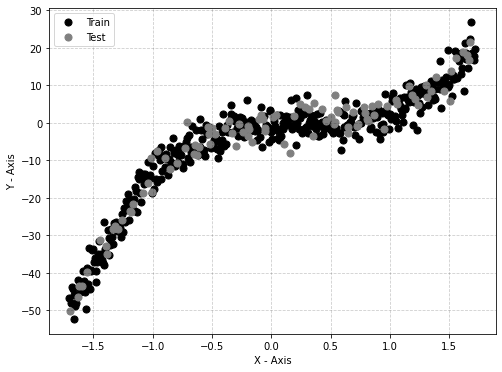

In [15]:
#Scatter plot of train and test
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='black', s=50, label='Train')
plt.scatter(X_test, y_test, color='grey', s=50, label='Test')
plt.ylabel("Y - Axis")
plt.xlabel("X - Axis")
plt.grid(True, ls='--', alpha=0.2, color='black')
plt.legend()
plt.show()

#### Model Selection 

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import make_pipeline

In [18]:
#polynomial regression model
degree = 3

In [19]:
#lasso model
lasso_model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=0.001, max_iter=10000))
lasso_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('lasso', Lasso(alpha=0.001, max_iter=10000))])

In [20]:
#ridge model
ridge_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0.001))
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge(alpha=0.001))])

#### Cross Validation 

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
#Five fold for lasso model
cv_scores = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='r2')
print("R-squared scores for each fold:", cv_scores)
#mean r square
mean_r2 = np.mean(cv_scores)
print("Mean R-squared score:", mean_r2)

test_r2 = lasso_model.score(X_test, y_test)
print("R-squared score on test data:", test_r2)

R-squared scores for each fold: [0.97367254 0.95030924 0.95624267 0.95871101 0.95870621]
Mean R-squared score: 0.9595283343513895
R-squared score on test data: 0.959752041086994


In [24]:
#Five fold for ridge model
cv_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='r2')
print("R-squared scores for each fold:", cv_scores)
#mean r square
mean_r2 = np.mean(cv_scores)
print("Mean R-squared score:", mean_r2)

test_r2 = ridge_model.score(X_test, y_test)
print("R-squared score on test data:", test_r2)

R-squared scores for each fold: [0.97367362 0.95031333 0.95623609 0.95870649 0.95871187]
Mean R-squared score: 0.9595282783015351
R-squared score on test data: 0.9597545050008857


#### Mean Square Error

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
#mean square error for lasso model
y_pred = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
#root mean square error for lasso model
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 8.475442376656375
Root Mean Squared Error (RMSE): 2.9112613033969272


In [28]:
#mean square error for ridge model
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
#root mean square error for ridge model
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 8.474923524004609
Root Mean Squared Error (RMSE): 2.9111721907171018


In [29]:
#predicting range
def predict_range(polyreg_model, X, num_points=100.0):
    x_min, x_max = X.min(), X.max()
    #num_points is an integer
    num_points_int = int(round(num_points))
    x_fit = np.linspace(x_min, x_max, num_points_int)
    y_fit = polyreg_model.predict(x_fit[:, np.newaxis])
    return x_fit, y_fit

In [30]:
X_length = len(X)
print(X_length)

500


In [31]:
X_train_lasso, y_train_lasso = predict_range(lasso_model, X_train, (X_length * 0.8))
X_test_lasso, y_test_lasso = predict_range(lasso_model, X_test, (X_length * 0.2))

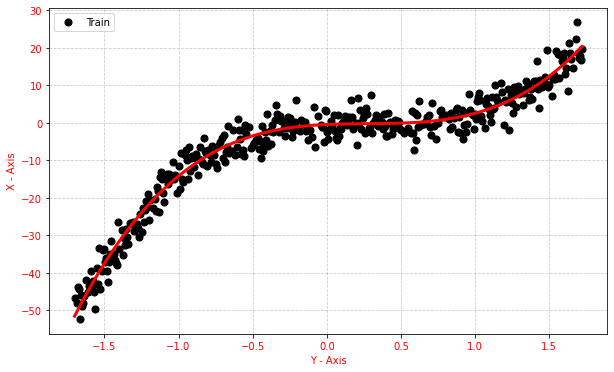

In [32]:
#Lasso train best fit line
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, color='black', s=50, label='Train')
plt.plot(X_train_lasso, y_train_lasso, color='red', lw=3)
plt.legend()
plt.xlabel("Y - Axis", color='red', fontsize=10)
plt.ylabel("X - Axis", color='red', fontsize=10)
plt.grid(True, ls='--', alpha=0.2, color='black')
plt.xticks(color='red', fontsize=10) 
plt.yticks(color='red', fontsize=10) 
plt.show()

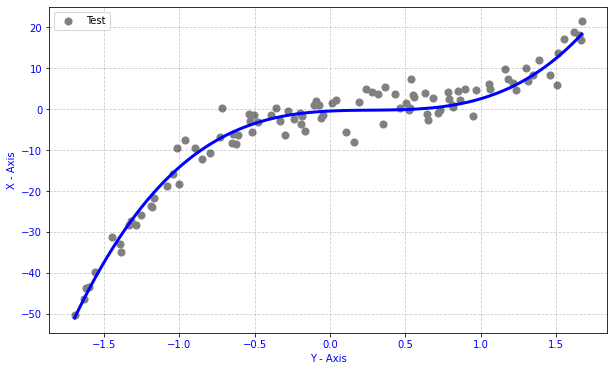

In [33]:
#Lasso test best fit line
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='grey', s=50, label='Test')
plt.plot(X_test_lasso, y_test_lasso, color='blue', lw=3)
plt.legend()
plt.xlabel("Y - Axis", color='blue', fontsize=10)
plt.ylabel("X - Axis", color='blue', fontsize=10)
plt.grid(True, ls='--', alpha=0.2, color='black')
plt.xticks(color='blue', fontsize=10) 
plt.yticks(color='blue', fontsize=10) 
plt.show()

In [34]:
X_train_ridge, y_train_ridge = predict_range(ridge_model, X_train, 400)
X_test_ridge, y_test_ridge = predict_range(ridge_model, X_test, 100)

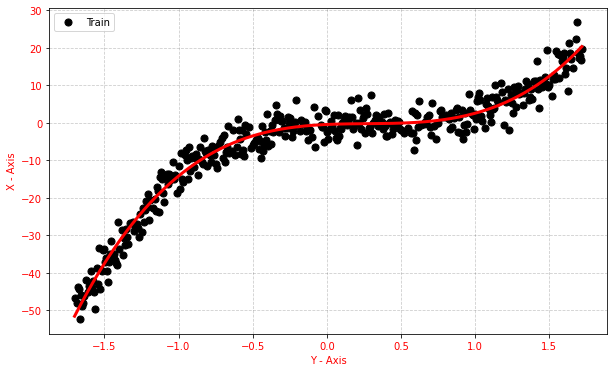

In [35]:
#ridge train best fit line
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, color='black', s=50, label='Train')
plt.plot(X_train_ridge, y_train_ridge, color='red', lw=3)
plt.legend()
plt.xlabel("Y - Axis", color='red', fontsize=10)
plt.ylabel("X - Axis", color='red', fontsize=10)
plt.grid(True, ls='--', alpha=0.2, color='black')
plt.xticks(color='red', fontsize=10) 
plt.yticks(color='red', fontsize=10) 
plt.show()

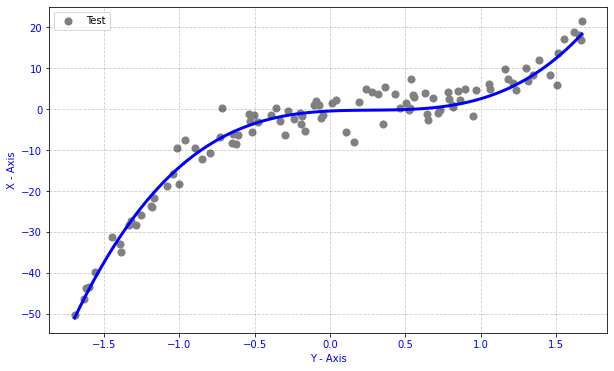

In [36]:
#ridge test best fit line
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='grey', s=50, label='Test')
plt.plot(X_test_ridge, y_test_ridge, color='blue', lw=3)
plt.legend()
plt.xlabel("Y - Axis", color='blue', fontsize=10)
plt.ylabel("X - Axis", color='blue', fontsize=10)
plt.grid(True, ls='--', alpha=0.2, color='black')
plt.xticks(color='blue', fontsize=10) 
plt.yticks(color='blue', fontsize=10) 
plt.show()

#### Residual Analysis 

In [38]:
#lasso and ridge residual for test set
lasso_pred_test = lasso_model.predict(X_test)
ridge_pred_test = ridge_model.predict(X_test)

lasso_residuals_test = y_test - lasso_pred_test
ridge_residuals_test = y_test - ridge_pred_test

In [39]:
#lasso and ridge residual for train set
lasso_pred_train = lasso_model.predict(X_train)
ridge_pred_train = ridge_model.predict(X_train)

lasso_residuals_train = y_train - lasso_pred_train
ridge_residuals_train = y_train - ridge_pred_train

#### Lasso Residual Analysis 

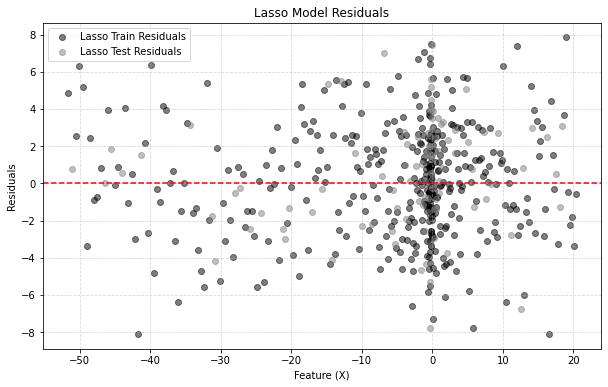

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(lasso_pred_train, lasso_residuals_train, color='black', alpha=0.5, label='Lasso Train Residuals')
plt.scatter(lasso_pred_test, lasso_residuals_test, color='grey', alpha=0.5, label='Lasso Test Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Lasso Model Residuals')
plt.xlabel('Feature (X)')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True, ls='--', alpha=0.5)
plt.show()

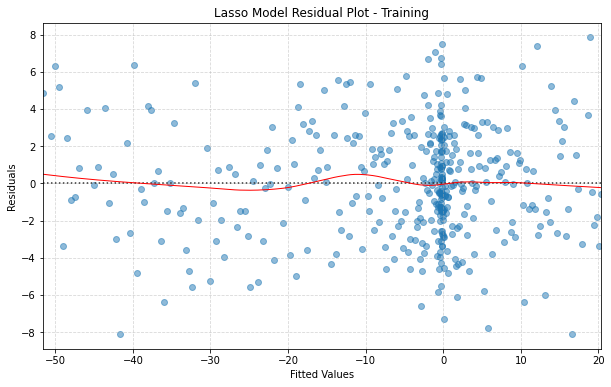

In [42]:
plt.figure(figsize=(10, 6))
sns.residplot(x=lasso_pred_train, y=lasso_residuals_train, lowess=True,
              scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title('Lasso Model Residual Plot - Training')
plt.grid(True, ls='--', alpha=0.5)
plt.show()

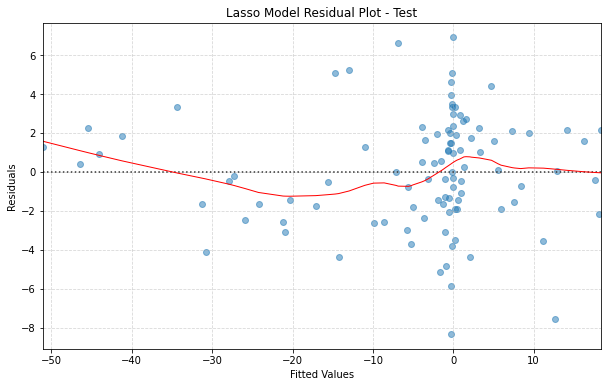

In [43]:
plt.figure(figsize=(10, 6))
sns.residplot(x=lasso_pred_test, y=lasso_residuals_test, lowess=True,
              scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title('Lasso Model Residual Plot - Test')
plt.grid(True, ls='--', alpha=0.5)
plt.show()

#### Scale Location Plot 

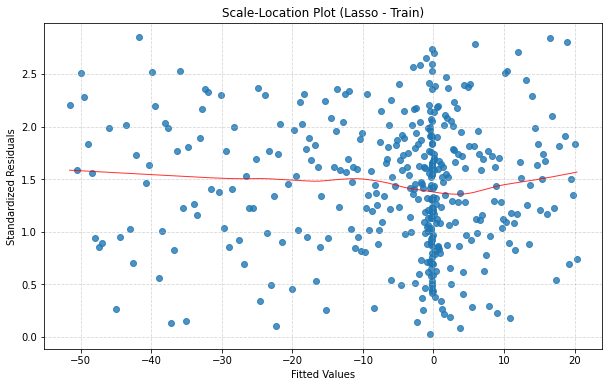

In [45]:
model_norm_residuals_abs_sqrt_lasso_train = np.sqrt(np.abs(lasso_residuals_train))
plt.figure(figsize=(10, 6))
sns.regplot(lasso_pred_train.reshape(-1), model_norm_residuals_abs_sqrt_lasso_train,
            scatter=True,
            lowess=True, 
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standardized Residuals")
plt.xlabel("Fitted Values")
plt.title('Scale-Location Plot (Lasso - Train)')
plt.grid(True, ls='--', alpha=0.5)
plt.show()

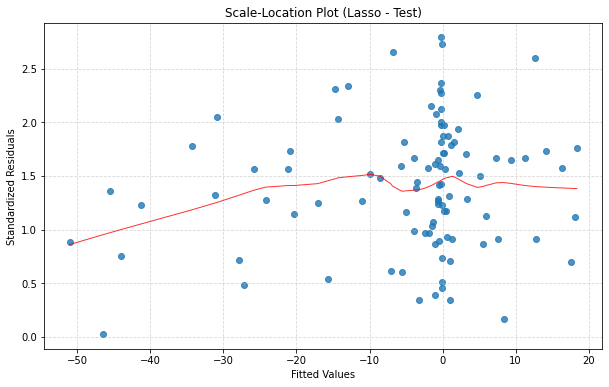

In [46]:
model_norm_residuals_abs_sqrt_lasso_test = np.sqrt(np.abs(lasso_residuals_test))
plt.figure(figsize=(10, 6))
sns.regplot(lasso_pred_test.reshape(-1), model_norm_residuals_abs_sqrt_lasso_test,
            scatter=True,
            lowess=True, 
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standardized Residuals")
plt.xlabel("Fitted Values")
plt.title('Scale-Location Plot (Lasso - Test)')
plt.grid(True, ls='--', alpha=0.5)
plt.show()

#### Histogram Plot of Residuals 

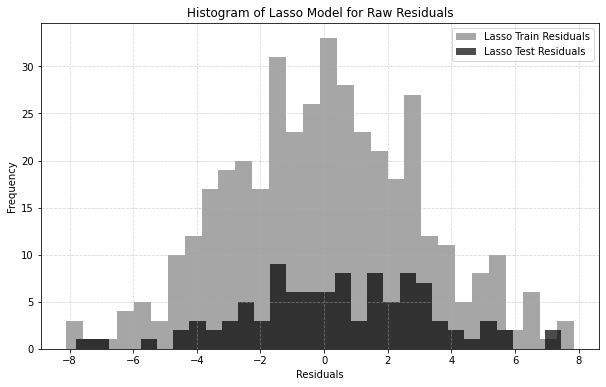

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(lasso_residuals_train, bins=30, alpha=0.7, label='Lasso Train Residuals', color='grey')
plt.hist(lasso_residuals_test, bins=30, alpha=0.7, label='Lasso Test Residuals', color='black')
plt.title('Histogram of Lasso Model for Raw Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, ls='--', alpha=0.5)
plt.show()

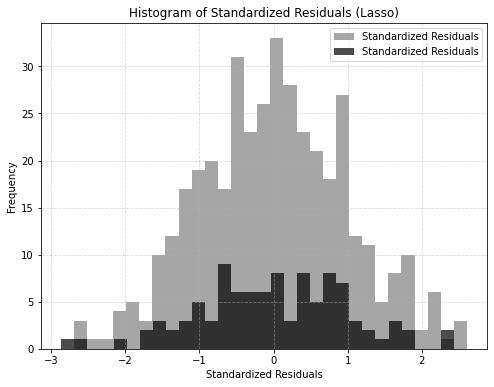

In [49]:
standardized_residuals_lasso_train = (lasso_residuals_train - np.mean(lasso_residuals_train)) / np.std(lasso_residuals_train)
standardized_residuals_lasso_test = (lasso_residuals_test - np.mean(lasso_residuals_test)) / np.std(lasso_residuals_test)
plt.figure(figsize=(8, 6))
plt.hist(standardized_residuals_lasso_train, bins=30, alpha=0.7, label='Standardized Residuals', color='grey')
plt.hist(standardized_residuals_lasso_test, bins=30, alpha=0.7, label='Standardized Residuals', color='black')
plt.title('Histogram of Standardized Residuals (Lasso)')
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, ls='--', alpha=0.5)
plt.show()

#### Residual Box plot

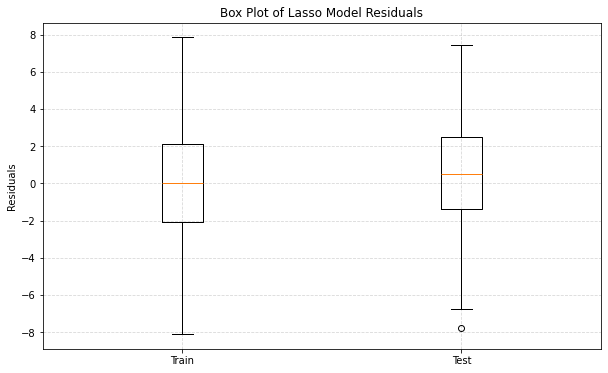

In [51]:
plt.figure(figsize=(10, 6))
plt.boxplot([lasso_residuals_train, lasso_residuals_test], labels=['Train', 'Test'])
plt.title('Box Plot of Lasso Model Residuals')
plt.ylabel('Residuals')
plt.grid(True, ls='--', alpha=0.5)
plt.show()

#### QQ Residual plot 

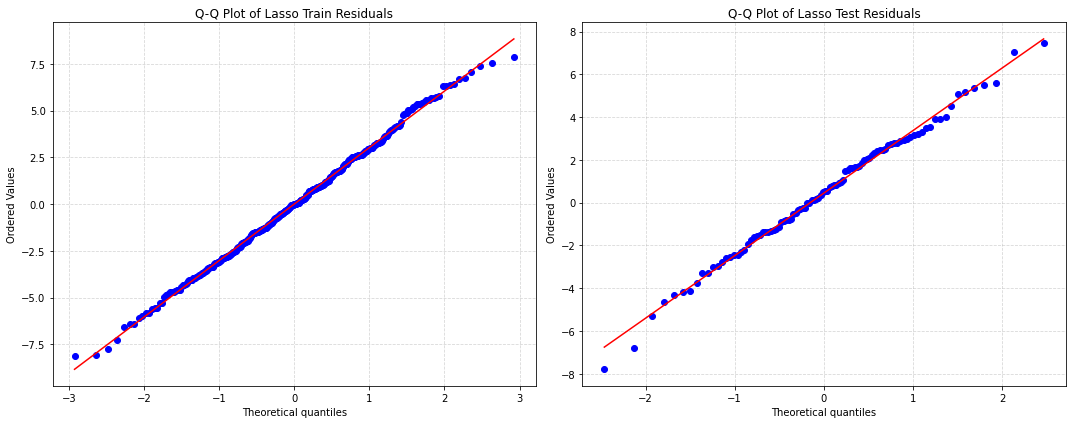

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Lasso Train Residuals Q-Q Plot
stats.probplot(lasso_residuals_train, dist="norm", plot=ax1)
ax1.set_title('Q-Q Plot of Lasso Train Residuals')
ax1.grid(True, ls='--', alpha=0.5)

# Lasso Test Residuals Q-Q Plot
stats.probplot(lasso_residuals_test, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot of Lasso Test Residuals')
ax2.grid(True, ls='--', alpha=0.5)

plt.tight_layout()
plt.show()

#### Ridge Residual Analysis 

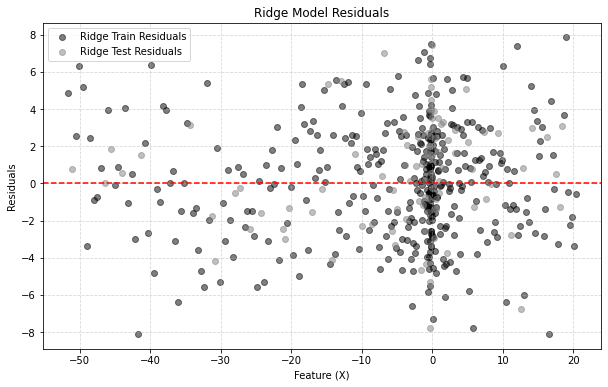

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(ridge_pred_train, ridge_residuals_train, color='black', alpha=0.5, label='Ridge Train Residuals')
plt.scatter(ridge_pred_test, ridge_residuals_test, color='grey', alpha=0.5, label='Ridge Test Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Ridge Model Residuals')
plt.xlabel('Feature (X)')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True, ls='--', alpha=0.5)
plt.show()

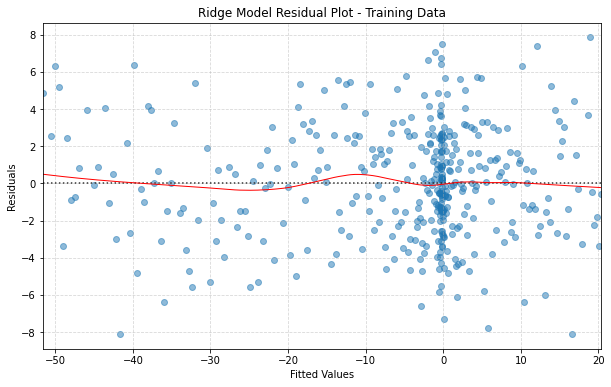

In [56]:
plt.figure(figsize=(10, 6))
sns.residplot(x=ridge_pred_train, y=ridge_residuals_train, lowess=True,
              scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title('Ridge Model Residual Plot - Training Data')
plt.grid(True, ls='--', alpha=0.5)
plt.show()

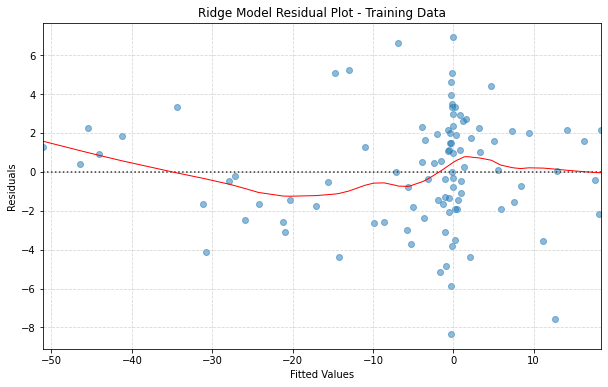

In [57]:
plt.figure(figsize=(10, 6))
sns.residplot(x=ridge_pred_test, y=ridge_residuals_test, lowess=True,
              scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title('Ridge Model Residual Plot - Training Data')
plt.grid(True, ls='--', alpha=0.5)
plt.show()

#### Scale Location Plot 

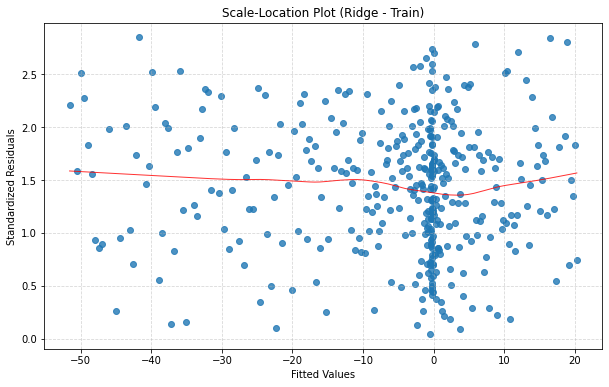

In [59]:
model_norm_residuals_abs_sqrt_ridge_train = np.sqrt(np.abs(ridge_residuals_train))
plt.figure(figsize=(10, 6))
sns.regplot(ridge_pred_train.reshape(-1), model_norm_residuals_abs_sqrt_ridge_train,
            scatter=True,
            lowess=True, 
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standardized Residuals")
plt.xlabel("Fitted Values")
plt.title('Scale-Location Plot (Ridge - Train)')
plt.grid(True, ls='--', alpha=0.5)
plt.show()

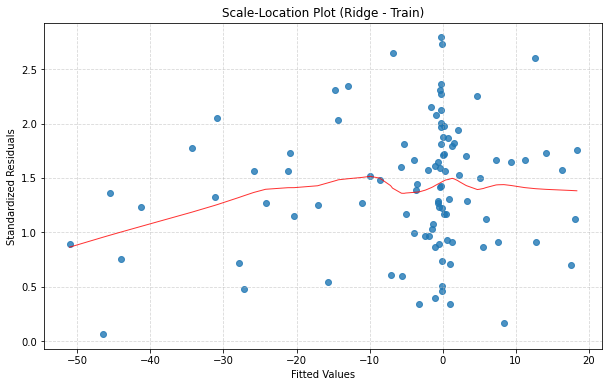

In [60]:
model_norm_residuals_abs_sqrt_ridge_test = np.sqrt(np.abs(ridge_residuals_test))
plt.figure(figsize=(10, 6))
sns.regplot(ridge_pred_test.reshape(-1), model_norm_residuals_abs_sqrt_ridge_test,
            scatter=True,
            lowess=True, 
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standardized Residuals")
plt.xlabel("Fitted Values")
plt.title('Scale-Location Plot (Ridge - Train)')
plt.grid(True, ls='--', alpha=0.5)
plt.show()

#### Residual Histogram Plot 

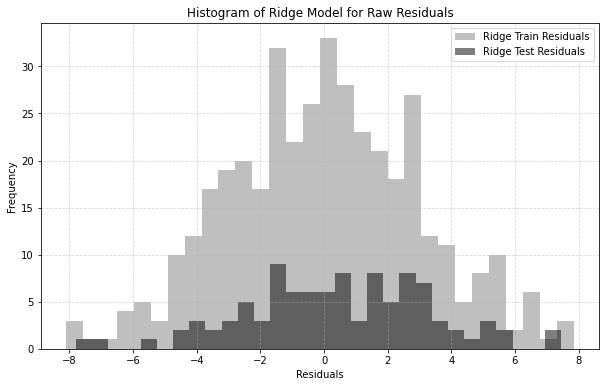

In [62]:
plt.figure(figsize=(10, 6))
plt.hist(ridge_residuals_train, bins=30, alpha=0.5, label='Ridge Train Residuals', color='grey')
plt.hist(ridge_residuals_test, bins=30, alpha=0.5, label='Ridge Test Residuals', color='black')
plt.title('Histogram of Ridge Model for Raw Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, ls='--', alpha=0.5)
plt.show()

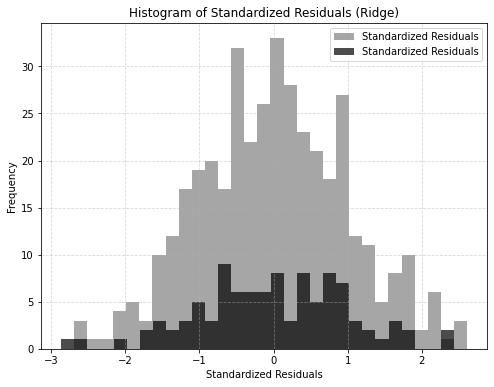

In [63]:
standardized_residuals_ridge_train = (ridge_residuals_train - np.mean(ridge_residuals_train)) / np.std(ridge_residuals_train)
standardized_residuals_ridge_test = (ridge_residuals_test - np.mean(ridge_residuals_test)) / np.std(ridge_residuals_test)
plt.figure(figsize=(8, 6))
plt.hist(standardized_residuals_ridge_train, bins=30, alpha=0.7, label='Standardized Residuals', color='grey')
plt.hist(standardized_residuals_ridge_test, bins=30, alpha=0.7, label='Standardized Residuals', color='black')
plt.title('Histogram of Standardized Residuals (Ridge)')
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, ls='--', alpha=0.5)
plt.show()

#### Residual Box Plot 

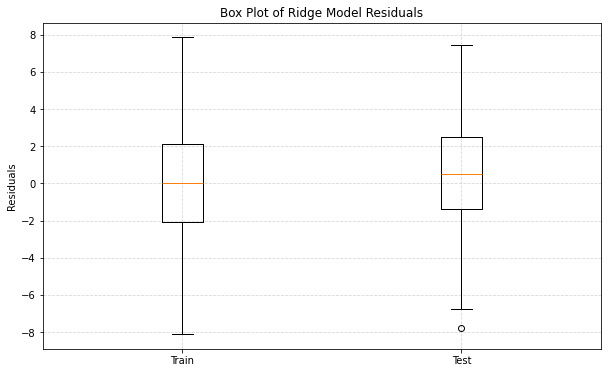

In [65]:
plt.figure(figsize=(10, 6))
plt.boxplot([ridge_residuals_train, ridge_residuals_test], labels=['Train', 'Test'])
plt.title('Box Plot of Ridge Model Residuals')
plt.ylabel('Residuals')
plt.grid(True, ls='--', alpha=0.5)
plt.show()

#### QQ Residual Plot 

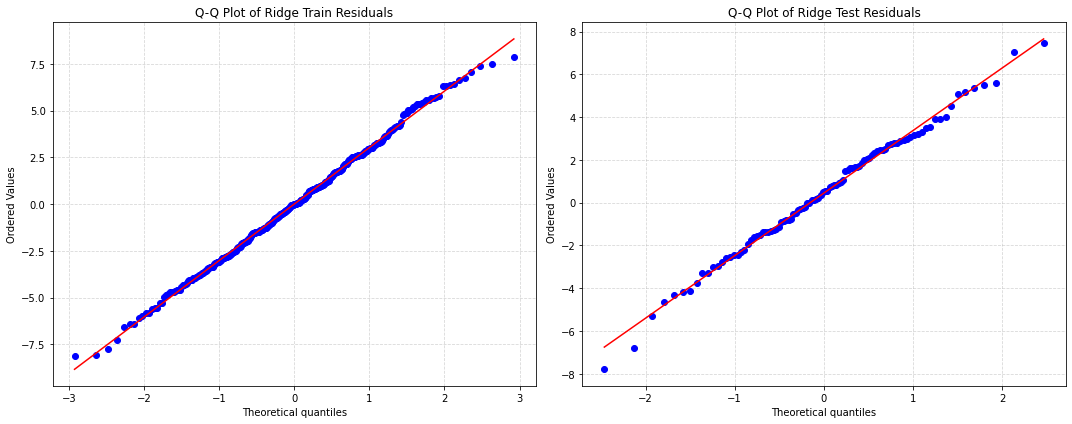

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Ridge Train Residuals Q-Q Plot
stats.probplot(ridge_residuals_train, dist="norm", plot=ax1)
ax1.set_title('Q-Q Plot of Ridge Train Residuals')
ax1.grid(True, ls='--', alpha=0.5)

# Ridge Test Residuals Q-Q Plot
stats.probplot(ridge_residuals_test, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot of Ridge Test Residuals')
ax2.grid(True, ls='--', alpha=0.5)

plt.tight_layout()
plt.show()

#### References: 
    
https://www.scikit-yb.org/en/latest/api/regressor/residuals.html

https://seaborn.pydata.org/generated/seaborn.residplot.html